In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import datetime

In [4]:
from pathlib import Path

In [5]:
%cd /mnt/data/vieri/projects/PV_predMan/

/mnt/data/vieri/projects/PV_predMan


In [127]:
chieuti_irr = pd.read_excel('data/CHIEUTI/CHIEUTI - IRR. ANNO 2020 15 MINUTI.XLS')

In [128]:
def df_wrangler(chieuti_irr, col1 = 'Date', col2 = 'Irraggiamento [W/m^2]'):
    for index, row in chieuti_irr.iterrows():
        date = row[0].split(';')[0]
        chieuti_irr.at[index, col1] = datetime.datetime(year = int(date[6:10]), month = int(date[3:5]), day = int(date[0:2]),  hour = int(date[11:13]), minute = int(date[14:16]), second = int(date[17:19]))
        chieuti_irr.at[index, col2] = np.float(row[0].split(';')[1].replace('.','').replace(',','.'))
    chieuti_irr = chieuti_irr.iloc[:,1:]
    return chieuti_irr

In [129]:
chieuti_irr = df_wrangler(chieuti_irr, col1 = 'Date', col2 = 'Irraggiamento [W/m^2]')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f98a63e05f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98a63e0c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f98a63e01d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98a631b358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98a631b6a0>],
 'means': []}

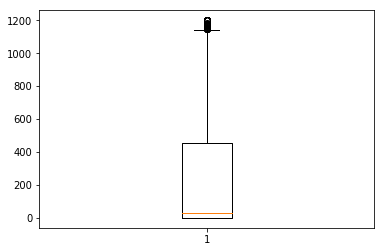

In [130]:
plt.boxplot(chieuti_irr.loc[:,'Irraggiamento [W/m^2]'])

In [208]:
chieuti_prod_inv1 = pd.read_excel('data/CHIEUTI/CHIEUTI-PROD. INVERTER 1 DAL 1-01 AL 27-10-2020 DA PAM.xls')

In [209]:
chieuti_prod_inv1 = df_wrangler(chieuti_prod_inv1, col1 = 'Date', col2 = 'EnergiaProdotta-INVERTER1-CHIEUTI[Wh]')
chieuti_prod_inv1 = chieuti_prod_inv1.sort_values('Date')

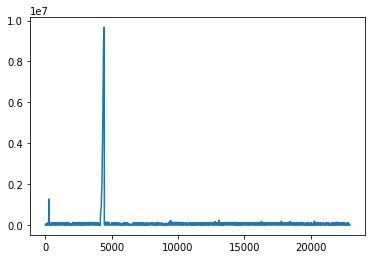

In [210]:
plt.plot(chieuti_prod_inv1.loc[:,'EnergiaProdotta-INVERTER1-CHIEUTI[Wh]'])

In [211]:
chieuti_irr_prod_inv1 = chieuti_irr.set_index('Date').join(chieuti_prod_inv1.set_index('Date')).dropna()

In [212]:
chieuti_prod_inv2 = pd.read_excel('data/CHIEUTI/CHIEUTI-PROD. INVERTER 2 DAL 1-01 AL 27-10-2020 DA PAM.xls')
chieuti_prod_inv2 = df_wrangler(chieuti_prod_inv2, col1 = 'Date', col2 = 'EnergiaProdotta-INVERTER2-CHIEUTI[Wh]')
chieuti_prod_inv2 = chieuti_prod_inv2.sort_values('Date')

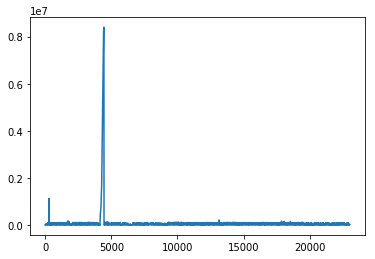

In [213]:
plt.plot(chieuti_prod_inv2.loc[:,'EnergiaProdotta-INVERTER2-CHIEUTI[Wh]'])

In [214]:
chieuti_irr_prod_inv2 = chieuti_irr.set_index('Date').join(chieuti_prod_inv2.set_index('Date')).dropna()

### KPI

In [215]:
P0_inv1 = 492.2
P0_inv2 = 432,4

#### rapporto tra energia prodotta ed energia irradiata

In [216]:
chieuti_irr_prod_inv1['e/i'] = chieuti_irr_prod_inv1['EnergiaProdotta-INVERTER1-CHIEUTI[Wh]']/chieuti_irr_prod_inv1['Irraggiamento [W/m^2]']

In [217]:
chieuti_irr_prod_inv1['PR'] = (chieuti_irr_prod_inv1['EnergiaProdotta-INVERTER1-CHIEUTI[Wh]']/P0_inv1)/chieuti_irr_prod_inv1['Irraggiamento [W/m^2]']

In [218]:
chieuti_irr_prod_inv1 = chieuti_irr_prod_inv1.reset_index()

In [219]:
chieuti_irr_prod_inv1['Day'] = chieuti_irr_prod_inv1.Date.dt.date

In [220]:
chieuti_irr_prod_inv1['Hour'] = chieuti_irr_prod_inv1.Date.dt.hour

In [221]:
chieuti_irr_prod_inv1_hour = chieuti_irr_prod_inv1.groupby(['Day','Hour']).mean()

In [222]:
chieuti_irr_prod_inv1_day = chieuti_irr_prod_inv1_hour.groupby(['Day']).mean()

In [223]:
chieuti_irr_prod_inv1_day['e/i'] = chieuti_irr_prod_inv1_day['EnergiaProdotta-INVERTER1-CHIEUTI[Wh]']/chieuti_irr_prod_inv1_day['Irraggiamento [W/m^2]']

In [224]:
chieuti_irr_prod_inv1_day['PR'] = (chieuti_irr_prod_inv1_day['EnergiaProdotta-INVERTER1-CHIEUTI[Wh]']/ P0_inv1 )/chieuti_irr_prod_inv1_day['Irraggiamento [W/m^2]']

In [226]:
chieuti_irr_prod_inv1_day

,Irraggiamento [W/m^2],EnergiaProdotta-INVERTER1-CHIEUTI[Wh],e/i,PR
Day,,,,
2020-02-10,29.409352,3490.740741,118.694923,0.241152
2020-02-11,86.774688,9354.166667,107.798333,0.219013
2020-02-12,220.851146,23500.000000,106.406512,0.216186
2020-02-13,210.420382,203032.916667,964.891874,1.960365
2020-02-14,61.005938,6541.666667,107.230000,0.217859
2020-02-15,244.274479,26885.416667,110.062323,0.223613
2020-02-16,246.164340,26149.305556,106.227025,0.215821
2020-02-17,237.285104,24968.750000,105.226791,0.213789
2020-02-18,229.167500,24864.583333,108.499605,0.220438


In [225]:
chieuti_irr_prod_inv1_day[chieuti_irr_prod_inv1_day['PR'] > 0.3]

,Irraggiamento [W/m^2],EnergiaProdotta-INVERTER1-CHIEUTI[Wh],e/i,PR
Day,,,,
2020-02-13,210.420382,2.030329e+05,964.891874,1.960365
2020-03-25,201.242500,2.761833e+05,1372.390690,2.788279
2020-03-26,63.692424,7.120000e+05,11178.723505,22.711750
2020-03-27,189.085000,1.274972e+06,6742.852274,13.699415
2020-03-28,428.336515,2.671538e+06,6237.007083,12.671693
2020-03-29,587.632652,5.248220e+06,8931.123353,18.145314
2020-03-30,511.927986,7.925653e+06,15481.968153,31.454629
2020-03-31,62.178490,5.331896e+06,85751.453100,174.220750


In [206]:
len(chieuti_irr_prod_inv1_day)

248

In [207]:
chieuti_irr_prod_inv1_day[chieuti_irr_prod_inv1_day['PR'] < 0.15]

,Irraggiamento [W/m^2],EnergiaProdotta-INVERTER1-CHIEUTI[Wh],e/i,PR
Day,,,,
2020-04-05,4596.6225,0.000,0.000000,0.000000
2020-04-15,7778.3825,480250.000,61.741628,0.125440
2020-04-25,7543.7825,446500.000,59.187815,0.120252
2020-04-26,7068.7100,441250.000,62.422988,0.126824
2020-04-30,7587.1900,502250.000,66.197103,0.134492
2020-05-05,6903.3275,354535.715,51.357221,0.104342


In [ ]:
chieuti_irr_prod_inv1_day[chieuti_irr_prod_inv1_day['PR'] > 0.3]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f98a79fff98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98a7855668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f98a79ffb70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98a7855cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98a7855dd8>],
 'means': []}

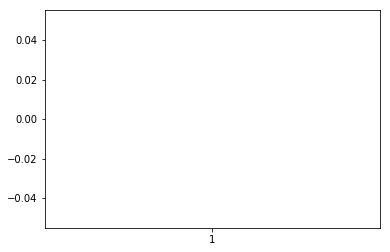

In [174]:
plt.boxplot(chieuti_irr_prod_inv1.loc[:,'PR'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f98a7eaaac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98a7eaaef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f98a7eaa6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98a7e3e828>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98a7e3eb70>],
 'means': []}

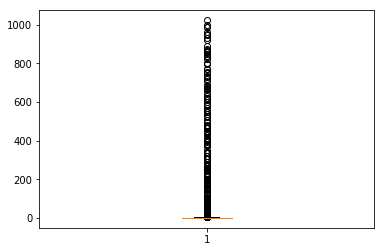

In [158]:
plt.boxplot(chieuti_irr_prod_inv1[chieuti_irr_prod_inv1['EnergiaProdotta-INVERTER1-CHIEUTI[Wh]'] == 0].loc[:,'Irraggiamento [W/m^2]'])

In [159]:
chieuti_irr_prod_inv1[(chieuti_irr_prod_inv1['EnergiaProdotta-INVERTER1-CHIEUTI[Wh]'] == 0) & (chieuti_irr_prod_inv1['Irraggiamento [W/m^2]'] >= 100)]

,Irraggiamento [W/m^2],EnergiaProdotta-INVERTER1-CHIEUTI[Wh],e/i
Date,,,
2020-04-04 15:45:00,497.35,0.0,0.0
2020-04-04 16:00:00,437.52,0.0,0.0
2020-04-04 16:15:00,371.84,0.0,0.0
2020-04-04 16:30:00,306.15,0.0,0.0
2020-04-04 16:45:00,245.15,0.0,0.0
2020-04-04 17:00:00,187.68,0.0,0.0
2020-04-04 17:15:00,130.20,0.0,0.0
2020-04-05 07:15:00,188.85,0.0,0.0
2020-04-05 07:30:00,123.16,0.0,0.0


In [161]:
#il 5/5/200 dalle 6:15 alle 10:45 a fronte di un irraggiamento sopra i 100 W/m^2 non viene prodotta energia, però non ho allarmi di interesse. Serve un criterio per etichettare i dati come anomali

In [162]:
chieuti_irr_prod_inv1[(chieuti_irr_prod_inv1['EnergiaProdotta-INVERTER1-CHIEUTI[Wh]'] > 0) & (chieuti_irr_prod_inv1['Irraggiamento [W/m^2]'] == 0)]

,Irraggiamento [W/m^2],EnergiaProdotta-INVERTER1-CHIEUTI[Wh],e/i
Date,,,
2020-02-19 17:30:00,0.0,1000.0,inf
2020-04-03 18:30:00,0.0,1000.0,inf
2020-07-11 19:30:00,0.0,1000.0,inf
2020-10-17 17:15:00,0.0,1000.0,inf
2020-10-20 17:15:00,0.0,1000.0,inf


In [167]:
chieuti_irr_prod_inv1[(chieuti_irr_prod_inv1['Irraggiamento [W/m^2]'] > 10) & (chieuti_irr_prod_inv1['e/i'] < 100)]

,Irraggiamento [W/m^2],EnergiaProdotta-INVERTER1-CHIEUTI[Wh],e/i
Date,,,
2020-02-10 19:45:00,19.94,0.0,0.000000
2020-02-11 07:00:00,15.24,0.0,0.000000
2020-02-11 07:30:00,36.36,1000.0,27.502750
2020-02-11 07:45:00,59.82,5000.0,83.584086
2020-02-11 08:15:00,126.68,9000.0,71.045153
2020-02-11 08:30:00,182.98,15000.0,81.976172
2020-02-11 08:45:00,197.06,18000.0,91.342738
2020-02-11 09:00:00,227.56,20000.0,87.888908
2020-02-11 09:30:00,323.74,31000.0,95.755853


In [160]:
#chieuti_irr_prod_inv1[(chieuti_irr_prod_inv1['e/i'] > 0) & (chieuti_irr_prod_inv1['e/i'] < 5000)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f98a7b80f28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98a7b6c8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f98a7b80dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98a7b6cf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98a7b552e8>],
 'means': []}

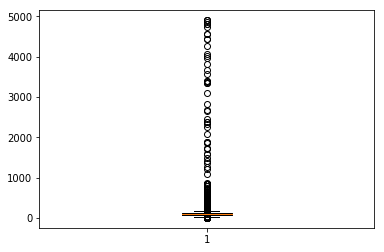

In [154]:
plt.boxplot(chieuti_irr_prod_inv1[(chieuti_irr_prod_inv1['e/i'] > 0) & (chieuti_irr_prod_inv1['e/i'] < 5000)].loc[:,'e/i'])

In [ ]:
chieuti_irr_prod_inv1.dropna().loc[:,'e/i']